In [1]:
import os
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display="diagram")

In [2]:
DATA_PATH = os.path.abspath(
    r"C:\Users\jan\Dropbox\_Coding\UdemyML\Chapter13_CaseStudies\CaseStudyIncome\adult.xlsx"
)

### Dataset

In [3]:
df = pd.read_excel(DATA_PATH)

In [4]:
idx = np.where(df["native-country"] == "Holand-Netherlands")[0]

In [5]:
data = df.to_numpy()

x = data[:, :-1]
x = np.delete(x, idx, axis=0)
y = data[:, -1]
y = np.delete(y, idx, axis=0)

categorical_features = [1, 2, 3, 4, 5, 6, 7, 9]
numerical_features = [0, 8]

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (48841, 10)
y shape: (48841,)


### y-Data

In [6]:
def one_hot(y):
    return np.array([0 if val == "<=50K" else 1 for val in y], dtype=np.int32)

In [7]:
y = one_hot(y)

### Helper

In [8]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

### Sklearn Imports

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Classifier and Params

In [11]:
params = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 100, 200]
}

clf = RandomForestClassifier()

### Ordinal Features

In [12]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder())
    ]
)

preprocessor_odinal = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

In [13]:
preprocessor_odinal

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 8]),
                                ('categorical',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 [1, 2, 3, 4, 5, 6, 7, 9])])

In [14]:
preprocessor_odinal.fit(x_train)

x_train_ordinal = preprocessor_odinal.transform(x_train)
x_test_ordinal = preprocessor_odinal.transform(x_test)

print(f"Shape of odinal data: {x_train_ordinal.shape}")
print(f"Shape of odinal data: {x_test_ordinal.shape}")

Shape of odinal data: (34188, 10)
Shape of odinal data: (14653, 10)


In [15]:
pipe_ordinal = Pipeline(
    steps=[
        ('preprocessor_odinal', preprocessor_odinal),
        ('classifier', clf)
    ]
)

In [16]:
pipe_ordinal

Pipeline(steps=[('preprocessor_odinal',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 8]),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 9])])),
                ('classifier', RandomForestClassifier())])

In [17]:
grid_ordinal = GridSearchCV(pipe_ordinal, params, cv=3)
grid_results_ordinal = grid_ordinal.fit(x_train, y_train)
print_grid_cv_results(grid_results_ordinal)

Best model score: 0.817947817947818 Best model params: {'classifier__max_depth': 200, 'classifier__n_estimators': 200} 
0.8169 (+/- 0.0022) with: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
0.8173 (+/- 0.002) with: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
0.8178 (+/- 0.0016) with: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
0.8174 (+/- 0.0024) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 50}
0.8179 (+/- 0.002) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 100}
0.8179 (+/- 0.0036) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 200}
0.8169 (+/- 0.001) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 50}
0.8174 (+/- 0.0034) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 100}
0.8179 (+/- 0.0012) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 200}


### OneHot Features

In [18]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown="ignore", sparse=False))
    ]
)

preprocessor_onehot = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

In [19]:
preprocessor_onehot

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 8]),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [1, 2, 3, 4, 5, 6, 7, 9])])

In [20]:
preprocessor_onehot.fit(x_train)

x_train_onehot = preprocessor_onehot.transform(x_train)
x_test_onehot = preprocessor_onehot.transform(x_test)

print(f"Shape of onehot data: {x_train_onehot.shape}")
print(f"Shape of onehot data: {x_test_onehot.shape}")

Shape of onehot data: (34188, 103)
Shape of onehot data: (14653, 103)


In [21]:
pipe_onehot = Pipeline(
    steps=[
        ('preprocessor_onehot', preprocessor_odinal),
        ('classifier', clf)
    ]
)

In [22]:
pipe_onehot

Pipeline(steps=[('preprocessor_onehot',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 8]),
                                                 ('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 9])])),
                ('classifier', RandomForestClassifier())])

In [23]:
grid_onehot = GridSearchCV(pipe_onehot, params, cv=3)
grid_results_onehot = grid_onehot.fit(x_train, y_train)
print_grid_cv_results(grid_results_onehot)

Best model score: 0.818094068094068 Best model params: {'classifier__max_depth': 100, 'classifier__n_estimators': 200} 
0.8173 (+/- 0.0016) with: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
0.8167 (+/- 0.0016) with: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
0.8173 (+/- 0.0038) with: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
0.818 (+/- 0.0024) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 50}
0.8177 (+/- 0.005) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 100}
0.8181 (+/- 0.0016) with: {'classifier__max_depth': 100, 'classifier__n_estimators': 200}
0.8163 (+/- 0.002) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 50}
0.8179 (+/- 0.003) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 100}
0.8175 (+/- 0.002) with: {'classifier__max_depth': 200, 'classifier__n_estimators': 200}


### TensorFlow Model

In [37]:
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [25]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [26]:
def build_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(units=128, input_dim=input_dim))
    model.add(Activation("relu"))
    model.add(Dense(units=64))
    model.add(Activation("relu"))
    model.add(Dense(units=output_dim))
    model.add(Activation("sigmoid"))
    return model

### Neural Network with Ordinal Features

In [27]:
model = build_model(
    input_dim=x_test_ordinal.shape[1],
    output_dim=y_train.shape[1]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=SGD(learning_rate=0.001),
    metrics=["binary_accuracy"]
)

history_ordinal = model.fit(
    x=x_train_ordinal,
    y=y_train,
    epochs=20,
    validation_data=(x_test_ordinal, y_test)
)

Epoch 1/20
1069/1069 [==============================] - 6s 4ms/step - loss: 0.5620 - binary_accuracy: 0.7354 - val_loss: 0.4939 - val_binary_accuracy: 0.7594
Epoch 2/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4853 - binary_accuracy: 0.7590 - val_loss: 0.5097 - val_binary_accuracy: 0.7466
Epoch 3/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4741 - binary_accuracy: 0.7617 - val_loss: 0.4750 - val_binary_accuracy: 0.7592
Epoch 4/20
1069/1069 [==============================] - 4s 3ms/step - loss: 0.4719 - binary_accuracy: 0.7642 - val_loss: 0.4730 - val_binary_accuracy: 0.7704
Epoch 5/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4686 - binary_accuracy: 0.7686 - val_loss: 0.4585 - val_binary_accuracy: 0.7657
Epoch 6/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4615 - binary_accuracy: 0.7674 - val_loss: 0.4632 - val_binary_accuracy: 0.7617
Epoch 7/20
1069/1069 [==============================

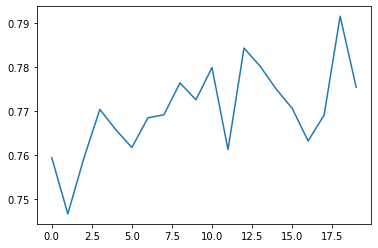

In [28]:
val_binary_accuracy = history_ordinal.history["val_binary_accuracy"]

plt.plot(range(len(val_binary_accuracy)), val_binary_accuracy)
plt.show()

### Neural Network with OneHot Features

In [29]:
model = build_model(
    input_dim=x_train_onehot.shape[1],
    output_dim=y_train.shape[1]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=SGD(learning_rate=0.001),
    metrics=["binary_accuracy"]
)

history_onehot = model.fit(
    x=x_train_onehot,
    y=y_train,
    epochs=20,
    validation_data=(x_test_onehot, y_test)
)

Epoch 1/20
1069/1069 [==============================] - 5s 4ms/step - loss: 0.6268 - binary_accuracy: 0.6721 - val_loss: 0.5141 - val_binary_accuracy: 0.7603
Epoch 2/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.5006 - binary_accuracy: 0.7592 - val_loss: 0.4658 - val_binary_accuracy: 0.7605
Epoch 3/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4540 - binary_accuracy: 0.7658 - val_loss: 0.4362 - val_binary_accuracy: 0.7755
Epoch 4/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4312 - binary_accuracy: 0.7814 - val_loss: 0.4185 - val_binary_accuracy: 0.7929
Epoch 5/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4118 - binary_accuracy: 0.7991 - val_loss: 0.4072 - val_binary_accuracy: 0.8015
Epoch 6/20
1069/1069 [==============================] - 4s 4ms/step - loss: 0.4042 - binary_accuracy: 0.8080 - val_loss: 0.3992 - val_binary_accuracy: 0.8074
Epoch 7/20
1069/1069 [==============================

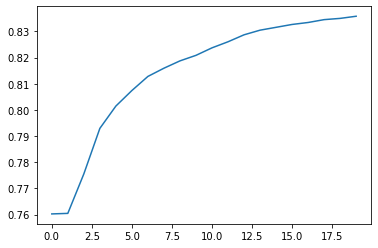

In [30]:
val_binary_accuracy = history_onehot.history["val_binary_accuracy"]

plt.plot(range(len(val_binary_accuracy)), val_binary_accuracy)
plt.show()

### Pass in user-data

In [31]:
pipe_ordinal.fit(x_train, y_train)
score = pipe_ordinal.score(x_test, y_test)

print(f"Score: {score}")

C:\Users\Jan\Anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Score: 0.8188084351327374


In [32]:
x_sample = [
    25,
    "Private",
    "11th",
    "Never-married",
    "Machine-op-inspct",
    "Own-child",
    "Black",
    "Male",
    40,
    "United-States"
]
y_sample = 0

y_pred_sample = pipe_ordinal.predict([x_sample])

print(f"Pred: {y_pred_sample}")

Pred: [0]
